In [2]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the dataset
loan_data=pd.read_csv('loan_data.csv')

In [4]:
loan_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11626,113544,0,Cash loans,M,N,N,0,135000.0,103500.0,4824.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
11627,113545,1,Cash loans,F,N,Y,0,225000.0,1011285.0,33552.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11628,113546,0,Cash loans,M,N,Y,0,89100.0,942300.0,30528.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11629,113547,0,Cash loans,M,N,Y,0,126000.0,432567.0,23593.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Data preprocessing

In [5]:
# column names in the dataframe
loan_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
#check the missing values
loan_data.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     1584
AMT_REQ_CREDIT_BUREAU_WEEK    1584
AMT_REQ_CREDIT_BUREAU_MON     1584
AMT_REQ_CREDIT_BUREAU_QRT     1584
AMT_REQ_CREDIT_BUREAU_YEAR    1584
Length: 122, dtype: int64

In [7]:
#checking the size of the data
loan_data.shape

(11631, 122)

In [8]:
#check the columns which has 'object' as datatype
list(loan_data.select_dtypes(['object']).columns)

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [9]:
len(list(loan_data.select_dtypes(['object']).columns))

16

In [10]:
#fill the missing values with median
loan_data = loan_data.fillna(loan_data.median())


In [11]:
loan_data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [12]:
# Print percentage of default to payer of the dataset for the TARGET column
defaulters=(loan_data.TARGET==1).sum()

In [13]:
payers=(loan_data.TARGET==0).sum()

In [14]:
percent=(defaulters/payers)*100

In [15]:
percent

8.36671946333737

In [16]:
defaulters = loan_data[loan_data.TARGET == 1]
payers = loan_data[loan_data.TARGET == 0]

In [17]:
defaulters.shape,payers.shape

((898, 122), (10733, 122))

In [18]:
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

RANDOM_SEED = 42
LABELS = [ "DEFAULTERS","PAYERS"]

In [ ]:
#data is imbalanced so we need to balance the dataset by oversampling technique

In [20]:
X=loan_data.drop('TARGET',axis=1)
Y=loan_data['TARGET']


In [ ]:
#perform oversampling

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
over= RandomOverSampler()

In [23]:
x_o,y_o=over.fit_resample(X,Y)

In [24]:
loan_data=x_o
loan_data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21461,102024,Cash loans,M,N,Y,0,130500.0,292500.0,18022.5,292500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
21462,111888,Cash loans,F,Y,Y,0,90000.0,848745.0,46044.0,675000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21463,105640,Cash loans,F,Y,Y,1,117000.0,409500.0,26793.0,409500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21464,102882,Cash loans,F,N,Y,1,85500.0,665892.0,21609.0,477000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [25]:
y_o

0        1
1        0
2        0
3        0
4        0
        ..
21461    1
21462    1
21463    1
21464    1
21465    1
Name: TARGET, Length: 21466, dtype: int64

In [26]:
loan_data['TARGET']=y_o

In [27]:
loan_data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21461,102024,Cash loans,M,N,Y,0,130500.0,292500.0,18022.5,292500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
21462,111888,Cash loans,F,Y,Y,0,90000.0,848745.0,46044.0,675000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
21463,105640,Cash loans,F,Y,Y,1,117000.0,409500.0,26793.0,409500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21464,102882,Cash loans,F,N,Y,1,85500.0,665892.0,21609.0,477000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


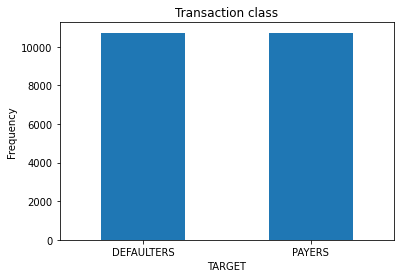

In [30]:
count_classes = pd.value_counts(loan_data['TARGET'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class")
plt.xticks(range(2), LABELS)
plt.xlabel("TARGET")
plt.ylabel("Frequency");

In [ ]:
#now the data is balanced

In [ ]:
 #Encode the columns that is required for the model

In [31]:
#label encoder
le_count = 0
le=LabelEncoder()

In [32]:

# Iterate through the columns
for column in x_o:
    if loan_data[column].dtype == 'object':
        
        loan_data[column] =le.fit_transform(loan_data[column])

loan_data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,100002,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,100007,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21461,102024,0,1,0,1,0,130500.0,292500.0,18022.5,292500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
21462,111888,0,0,1,1,0,90000.0,848745.0,46044.0,675000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
21463,105640,0,0,1,1,1,117000.0,409500.0,26793.0,409500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21464,102882,0,0,0,1,1,85500.0,665892.0,21609.0,477000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [33]:
loan_data.dtypes[loan_data.dtypes == 'int64']

SK_ID_CURR                    int64
NAME_CONTRACT_TYPE            int64
CODE_GENDER                   int64
FLAG_OWN_CAR                  int64
FLAG_OWN_REALTY               int64
CNT_CHILDREN                  int64
NAME_TYPE_SUITE               int64
NAME_INCOME_TYPE              int64
NAME_EDUCATION_TYPE           int64
NAME_FAMILY_STATUS            int64
NAME_HOUSING_TYPE             int64
OCCUPATION_TYPE               int64
WEEKDAY_APPR_PROCESS_START    int64
ORGANIZATION_TYPE             int64
FONDKAPREMONT_MODE            int64
HOUSETYPE_MODE                int64
WALLSMATERIAL_MODE            int64
EMERGENCYSTATE_MODE           int64
TARGET                        int64
dtype: object

In [34]:
(loan_data.dtypes == "int64").all()

False

In [35]:
X=loan_data.iloc[:,:121]
X

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21461,102024,0,1,0,1,0,130500.0,292500.0,18022.5,292500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
21462,111888,0,0,1,1,0,90000.0,848745.0,46044.0,675000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21463,105640,0,0,1,1,1,117000.0,409500.0,26793.0,409500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21464,102882,0,0,0,1,1,85500.0,665892.0,21609.0,477000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [36]:
Y=loan_data['TARGET']
Y.nunique()

2

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=12345)

In [39]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17172, 121), (4294, 121), (17172,), (4294,))

In [ ]:
#data is converted to array

In [40]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
y_test

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
#scaling the data

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(x_train)
scaled_test=scaler.transform(x_test)


In [43]:
print(scaled_data.shape)
print(y_train.shape)

(17172, 121)
(17172,)


In [44]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [46]:
model = Sequential()
model.add(Dense(80, input_dim=121, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

In [48]:
model.fit(scaled_data,y_train,epochs=500)

Epoch 1/500
537/537 [==============================] - 1s 2ms/step - loss: 0.6261 - accuracy: 0.6460
Epoch 2/500
537/537 [==============================] - 1s 2ms/step - loss: 0.5871 - accuracy: 0.6863
Epoch 3/500
537/537 [==============================] - 1s 2ms/step - loss: 0.5661 - accuracy: 0.7089
Epoch 4/500
537/537 [==============================] - 1s 2ms/step - loss: 0.5393 - accuracy: 0.7256
Epoch 5/500
537/537 [==============================] - 1s 2ms/step - loss: 0.5198 - accuracy: 0.7410
Epoch 6/500
537/537 [==============================] - 1s 2ms/step - loss: 0.4969 - accuracy: 0.7570
Epoch 7/500
537/537 [==============================] - 1s 1ms/step - loss: 0.4716 - accuracy: 0.7770
Epoch 8/500
537/537 [==============================] - 1s 2ms/step - loss: 0.4566 - accuracy: 0.7819
Epoch 9/500
537/537 [==============================] - 1s 2ms/step - loss: 0.4356 - accuracy: 0.7971
Epoch 10/500
537/537 [==============================] - 1s 2ms/step - loss: 0.4159 - accura

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                9760      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_4 (Dense)             (None, 80)                6480      
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 81        
                                                                 
Total params: 16,321
Trainable params: 16,321
Non-trainable params: 0
_________________________________________________________________


In [50]:
test_loss, test_acc = model.evaluate(scaled_test,y_test)

print('Test accuracy:', test_acc)

135/135 [==============================] - 0s 1ms/step - loss: 0.1130 - accuracy: 0.9702
Test accuracy: 0.9701909422874451


In [51]:
y_test

array([1, 1, 0, ..., 0, 1, 1])

In [52]:
y_pred=model.predict(scaled_test)
print([round(scaled_test[0]) for scaled_test in y_pred])



[1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 

In [53]:
#Calculate Sensitivity as a metrice
# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [55]:

cnf_matrix=confusion_matrix(y_test, y_pred.round())
cnf_matrix

array([[2065,  127],
       [   1, 2101]])

In [57]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2192
           1       0.94      1.00      0.97      2102

    accuracy                           0.97      4294
   macro avg       0.97      0.97      0.97      4294
weighted avg       0.97      0.97      0.97      4294



In [63]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score,auc,roc_curve
roc_auc_score(y_test, y_pred )

0.9899589459465091

In [64]:
mse = np.mean(np.power(scaled_test - y_pred, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df

,reconstruction_error,true_class
0,0.690944,1
1,0.621510,1
2,0.151044,0
3,0.161220,0
4,0.681210,1
...,...,...
4289,0.169571,0
4290,0.185614,0
4291,0.209584,0
4292,0.590340,1


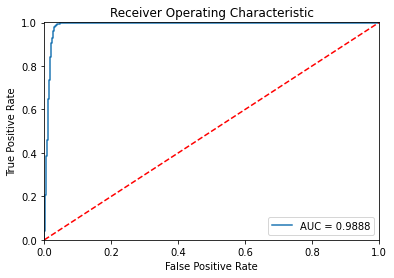

In [65]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

#### In this case AUC score is vey high so a high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).